# Modelling

In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.modelling.train import HousePriceModel
from datetime import datetime
import pickle

DATE = str(datetime.now().date())

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/jupyter/virtualenvironment/vertex_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Train and Test Datasets

In [3]:
train_df = pd.read_pickle('../Results/feature_engineered/train_feat_eng.pkl')
valid_df = pd.read_pickle('../Results/feature_engineered/valid_feat_eng.pkl')

In [5]:
train_df.shape

(1168, 64)

In [6]:
valid_df.shape

(292, 64)

<AxesSubplot:>

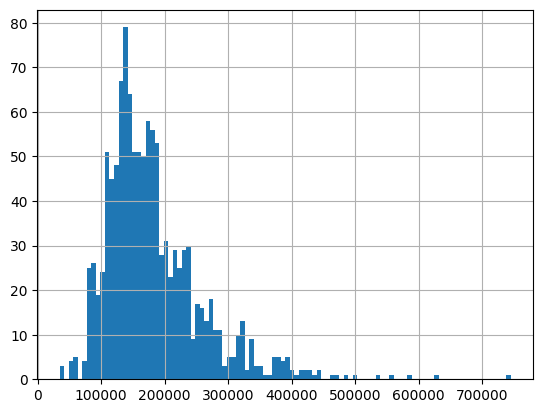

In [7]:
train_df['SalePrice'].hist(bins=100)

## Instantiate Model

In [4]:
house_price_model = HousePriceModel(train_df.copy(),
                                    valid_df.copy(),
                                    target='SalePrice',
                                    n_kfold_splits=2,
                                    n_trials=10,
                                    random_state=42)

In [5]:
train_df.dtypes

MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Alley            category
                   ...   
MiscVal             int64
MoSold            float64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 64, dtype: object

## Model Training

In [7]:
from xgboost import XGBRegressor

In [11]:
model = XGBRegressor(enable_categorical=True)

In [12]:
model.fit(train_df.drop('SalePrice', axis=1), train_df['SalePrice'])

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

In [14]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_df.drop('SalePrice', axis=1), enable_categorical=True)

In [16]:
model.fit(dtrain, train_df['SalePrice'])

Unknown data type: <class 'xgboost.core.DMatrix'>, trying to convert it to csr_matrix


TypeError: Not supported type for data.<class 'xgboost.core.DMatrix'>

In [5]:
house_price_model.train()

[I 2022-12-14 12:19:34,128] A new study created in memory with name: house_price_study
[W 2022-12-14 12:19:34,229] Trial 0 failed because of the following error: AttributeError("'DMatrix' object has no attribute 'drop'")
Traceback (most recent call last):
  File "/home/jupyter/virtualenvironment/vertex_env/lib/python3.8/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/home/jupyter/src/test-mlops-warda/src/modelling/train.py", line 250, in objective
    for nfold, (train_idx, test_idx) in enumerate(self.kfold_generator(self.train_df.drop(self.target, axis=1), n_splits=2)):
AttributeError: 'DMatrix' object has no attribute 'drop'


AttributeError: 'DMatrix' object has no attribute 'drop'

[I 2022-11-06 17:24:40,212] A new study created in memory with name: house_price_study
[I 2022-11-06 17:24:45,697] Trial 0 finished with value: -0.3035736027203617 and parameters: {'max_depth': 4, 'min_child_weight': 30, 'subsample': 0.7888020649527847, 'colsample_bytree': 0.7043974137256939, 'eta': 0.13467632968771281, 'num_round': 222}. Best is trial 0 with value: -0.3035736027203617.
[I 2022-11-06 17:24:51,389] Trial 1 finished with value: -0.11679898602503984 and parameters: {'max_depth': 6, 'min_child_weight': 27, 'subsample': 0.7663638449883273, 'colsample_bytree': 0.7323107257225281, 'eta': 0.19661323181252538, 'num_round': 244}. Best is trial 1 with value: -0.11679898602503984.
[I 2022-11-06 17:24:57,316] Trial 2 finished with value: -0.10530226936429796 and parameters: {'max_depth': 3, 'min_child_weight': 22, 'subsample': 0.999897218935075, 'colsample_bytree': 0.7995227990918541, 'eta': 0.1585675820250197, 'num_round': 185}. Best is trial 2 with value: -0.10530226936429796.
[I

(1168, 21) (292, 21)


src.modelling.train-INFO-
PLOTTING HYPERPARAMETER OPTIMISATION STUDY...


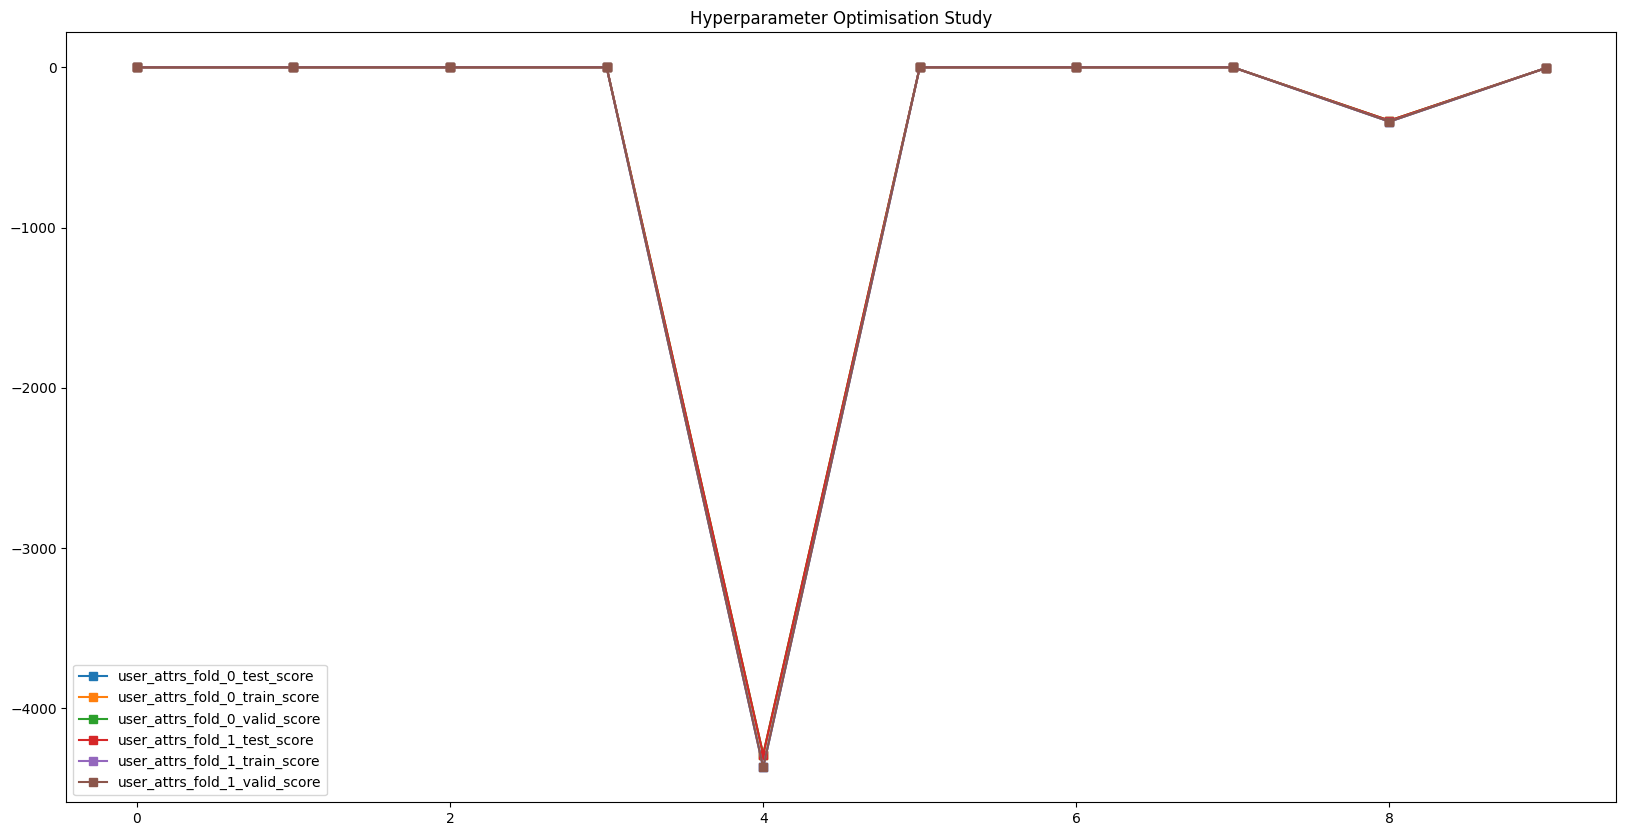

src.modelling.train-INFO-
CALCULATING TRAIN AND TEST SET SCORES...
src.modelling.train-INFO-MEAN_GAMMA_DEVIANCE:
src.modelling.train-INFO-BASELINE_SCORE:0.156    TRAIN_SCORE:0.087
src.modelling.train-INFO-BASELINE_SCORE:0.193    TEST_SCORE:0.106
src.modelling.train-INFO-----------------------------------------
src.modelling.train-INFO-R2_SCORE:
src.modelling.train-INFO-BASELINE_SCORE:0.000    TRAIN_SCORE:0.347
src.modelling.train-INFO-BASELINE_SCORE:-0.001    TEST_SCORE:0.344
src.modelling.train-INFO-----------------------------------------
src.modelling.train-INFO-
PLOTTING LIFT CHARTS...
src.modelling.train-INFO-
PLOTTING PREDICTED DISTRIBUTION


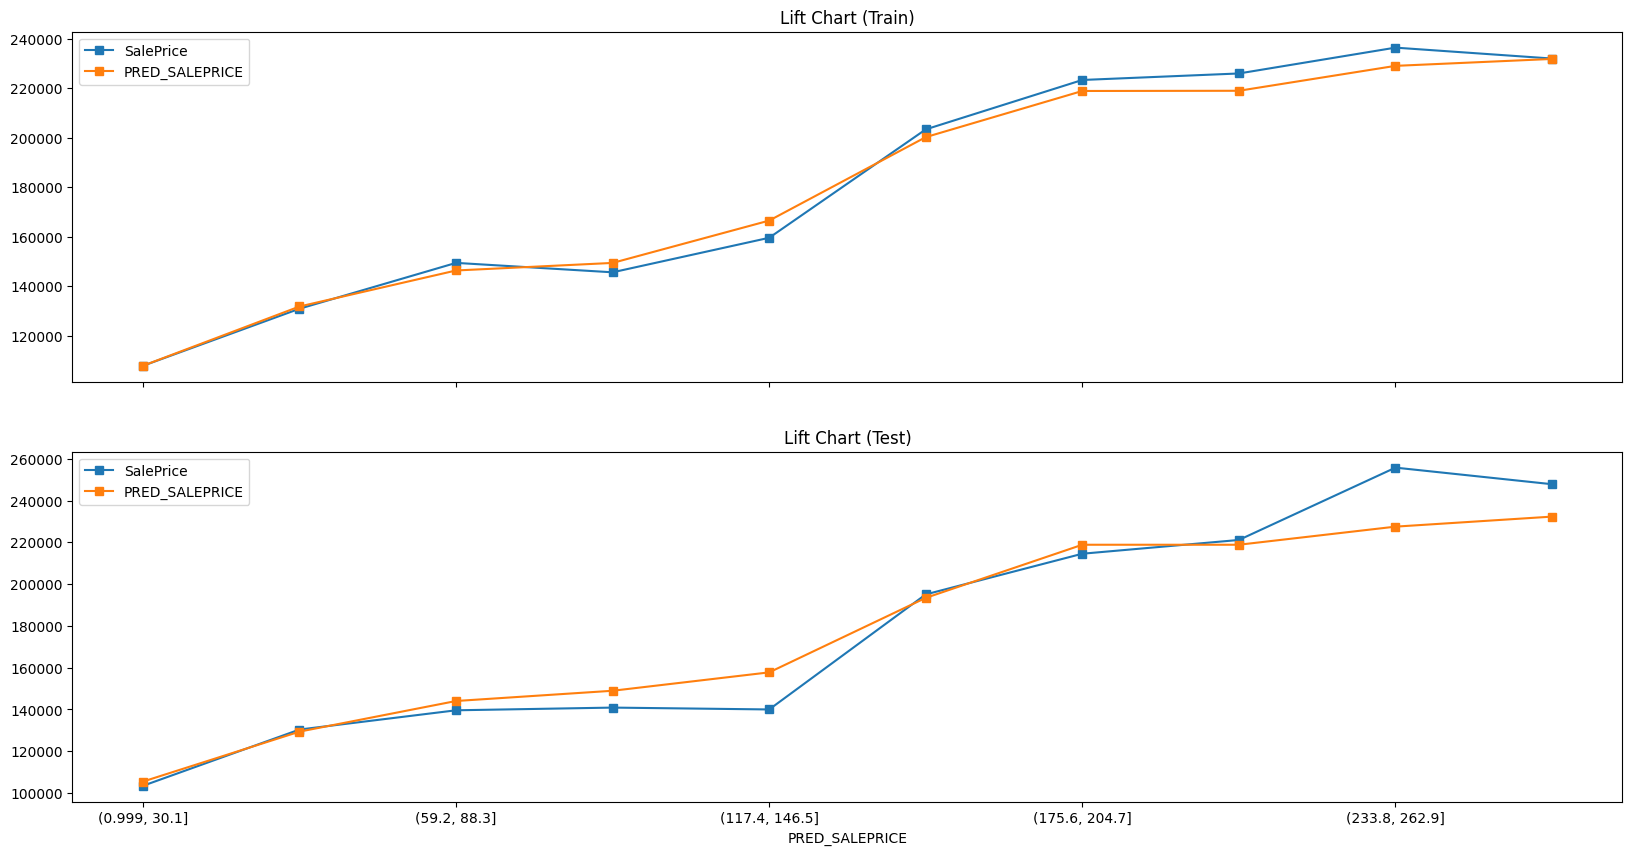

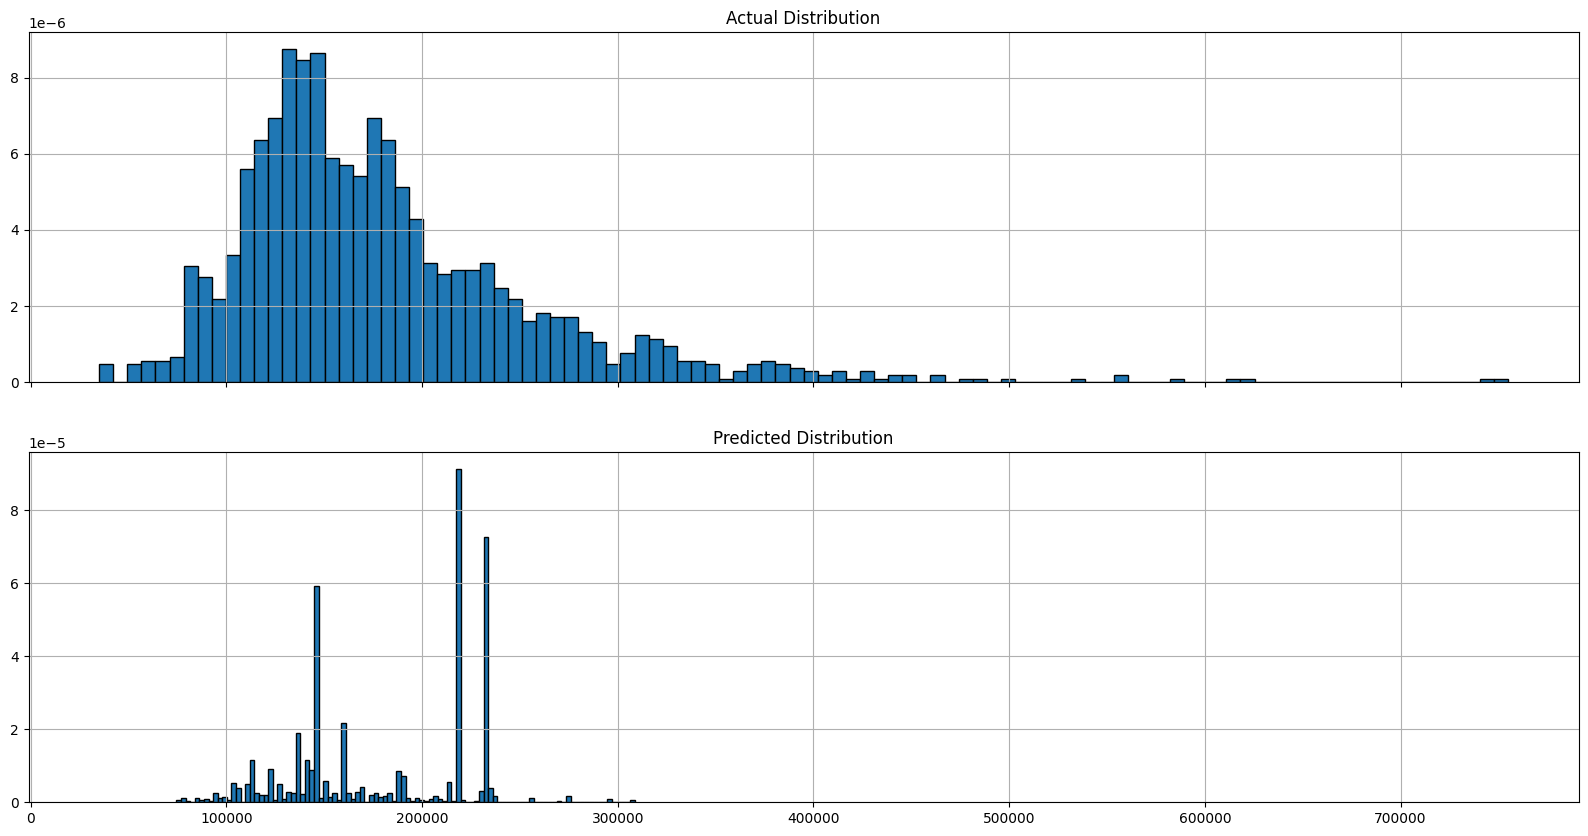

src.modelling.train-INFO-
PLOTTING MEDIAN SALE PRICES


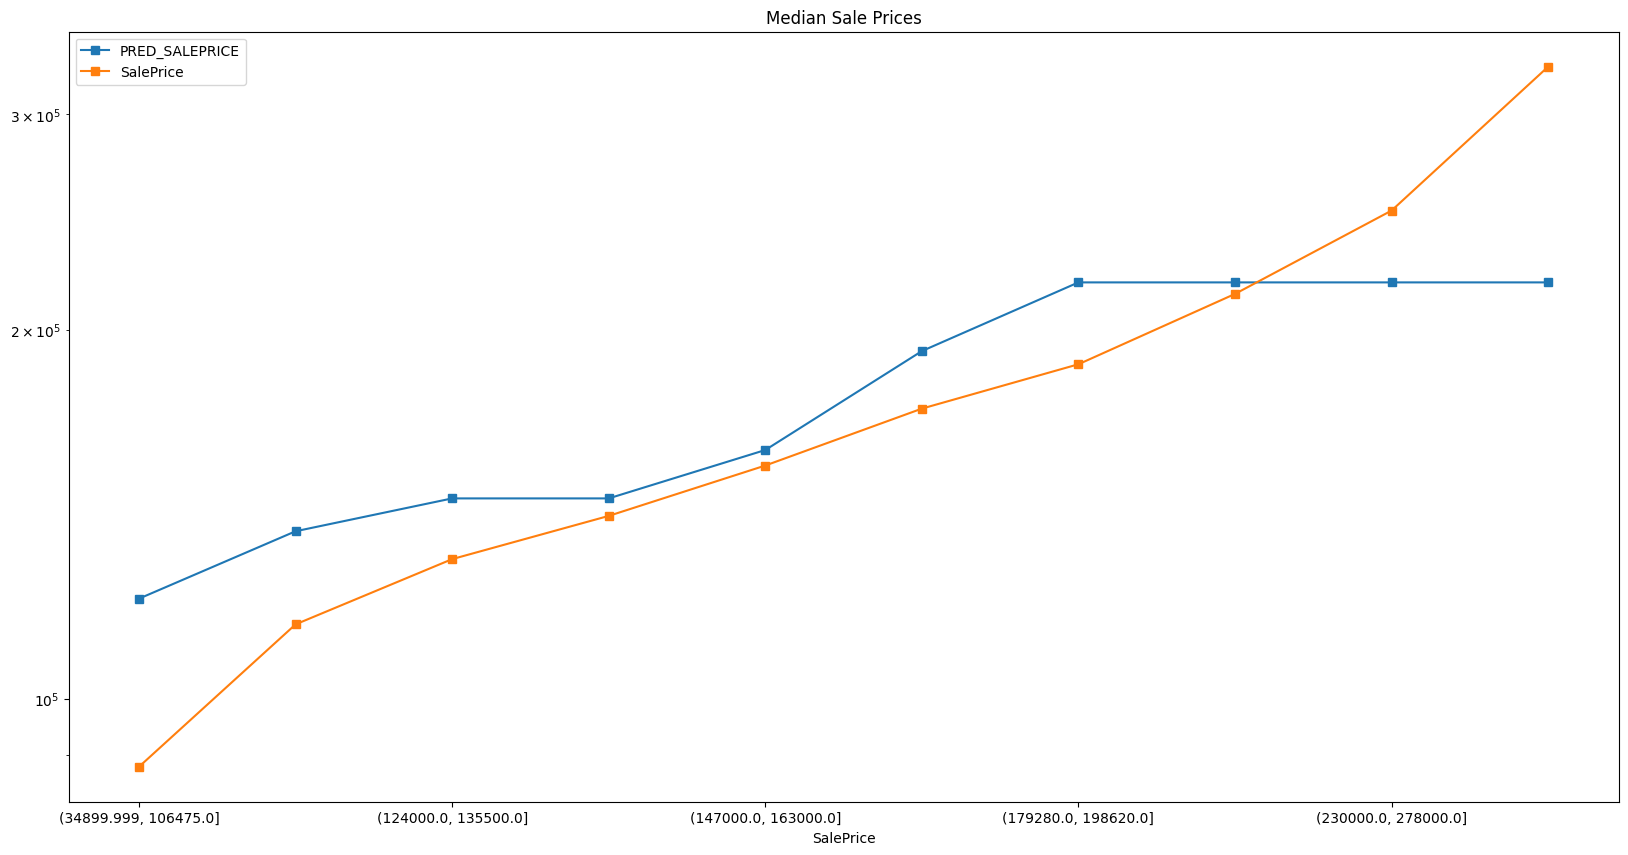


FEATURE IMPORTANCES AND DEPENDENCE PLOTS


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


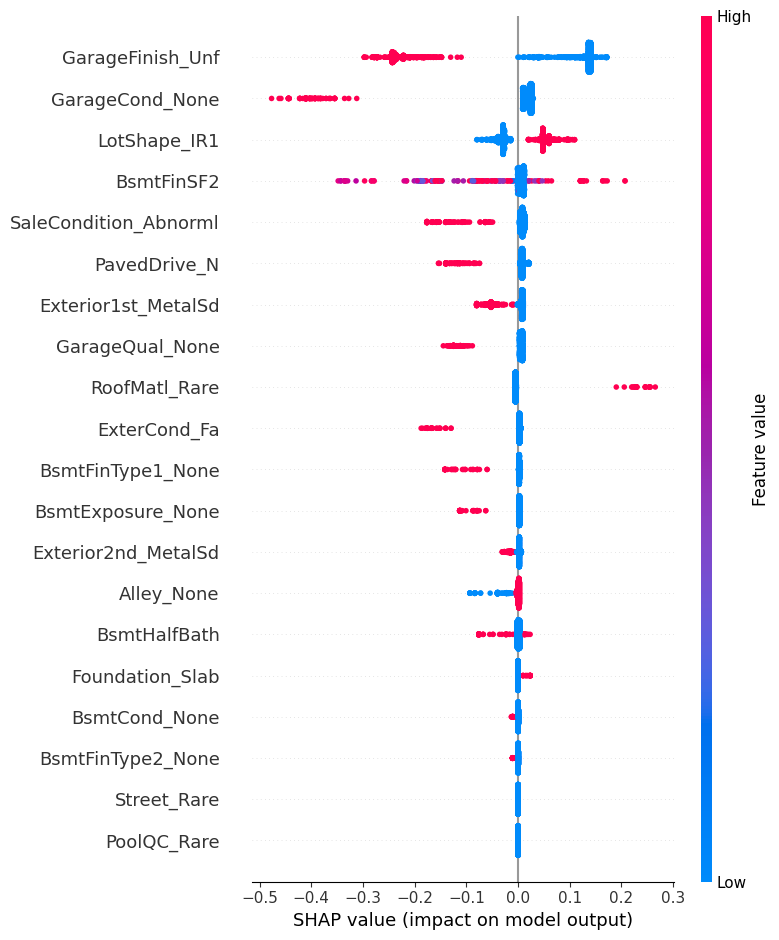

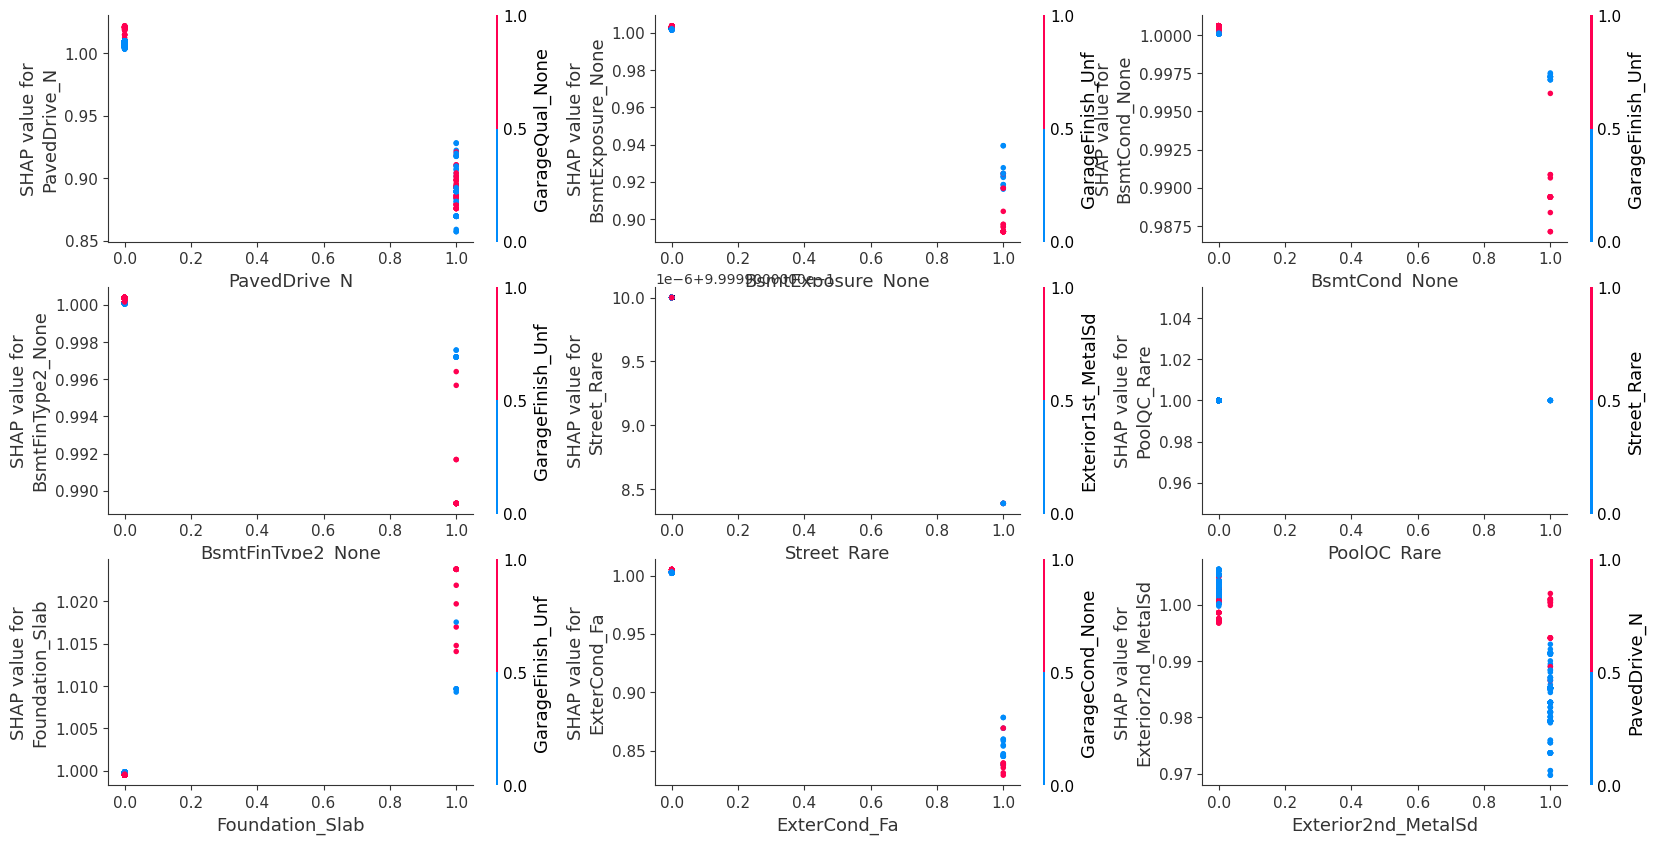

In [7]:
house_price_model.train()

## Model Evaluation

In [42]:
from src.modelling.model_validation import plot_cross_validated_metrics, plot_lorenz_curves

In [36]:
house_price_model.results_dict

{'train_neg_mean_gamma_deviance': array([-0.0922415 , -0.09396094]),
 'test_neg_mean_gamma_deviance': [-0.11652760748783934, -0.09556652716039263],
 'train_r2': array([0.30351806, 0.32954884]),
 'test_r2': [0.31216727480969975, 0.38172514064132546],
 'actual': array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
         84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
        183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
        192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
        200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
        114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
        451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
        213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
        283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
        109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
        118000,  670

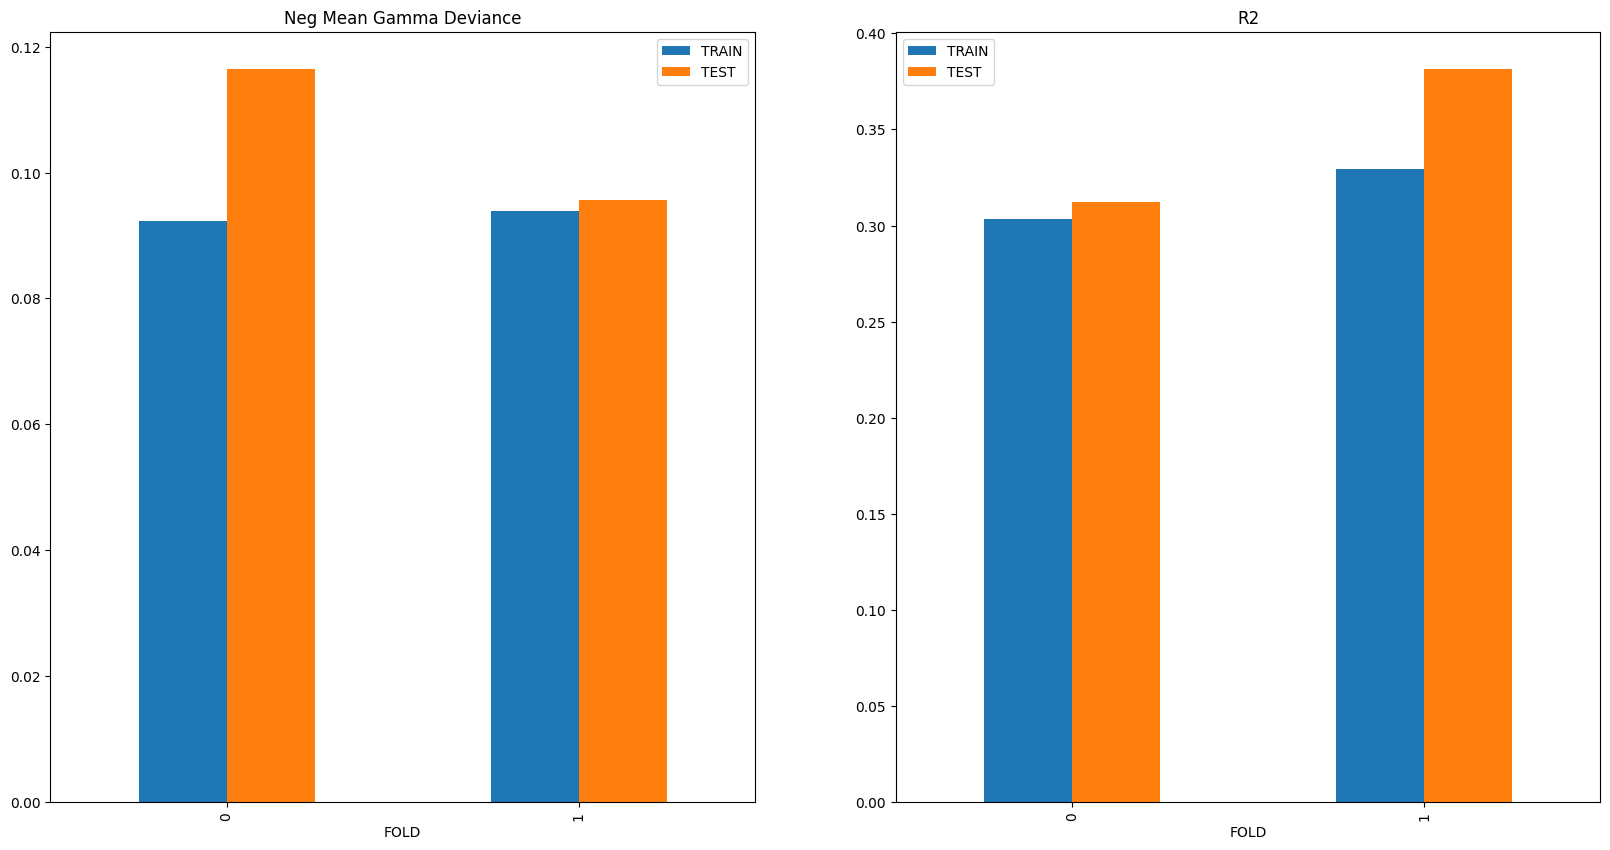

In [13]:
plot_cross_validated_metrics(cv_results=house_price_model.results_dict)

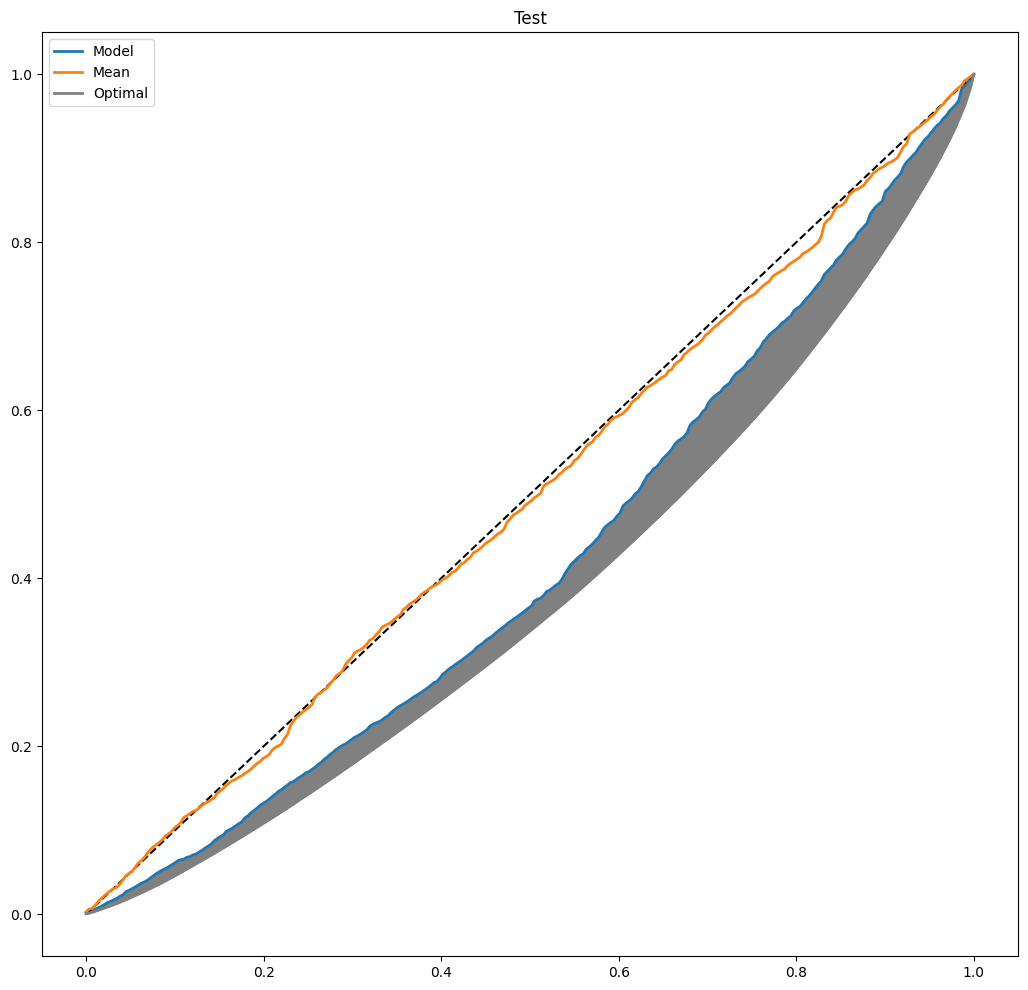

In [43]:
plot_lorenz_curves(cv_results=house_price_model.results_dict)